# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

* Решение
$$Q= \frac{1}{n} \sum_{i}^{n}(a_i-y_i)^2 + \frac{1}{C}R(w) =  \frac{1}{n} \sum_{i}^{n}((<w,x_i>)-y_i)^2 + \frac{1}{C}R(w) =  \frac{1}{n} \sum_{i}^{n}((<w,x_i>^2-2<w,x_i>y_i+y_i^2) + \frac{1}{C}R(w)$$

$$\nabla_w(R(w)) = \nabla_w(\sum_{j=1}^{D}w_j^2)= \frac{2}{C}(0,w_1,...,w_D)$$

$$\nabla_w(Q) = \frac{1}{n} \sum_{i}^{n} 2(<w,x_i>-y_i)x_i +\frac{2}{C}(0,w_1,...,w_D) $$

Перейдем к терминологии, где $x_i=(x_{i1},...x_{iD})$ (т.е. нет фиктивного признака)  

$$w_{0new} = w_{0old} - \alpha( \frac{2}{n} \sum_{i}^{n} (w_0+<w,x_i>)-y_i)$$

$$w_{new} = w_{old} - \alpha( \frac{2}{n} \sum_{i}^{n} ((w_0+<w,x_i>)-y_i)x_i +\frac{2}{C}w)$$


Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

* Решение
$$Q= \frac{1}{n} \sum_{i}^{n}(-y_i log(a_i)-(1-y_i)log(1-a_i)) + \frac{1}{C}R(w)$$ 

$$\nabla_w(R(w)) = \nabla_w(\sum_{j=1}^{D}w_j^2)= \frac{2}{C}(0,w_1,...,w_D)$$

$$\nabla_w(a_i) = \nabla_w( \frac{1}{1+ e^{-<w,x_i>}}) = \frac{(e^{-<w,x_i>})x_i}{(1+ e^{-<w,x_i>})^2}= \frac{x_i}{(1+ e^{-<w,x_i>})(1+ e^{<w,x_i>})}$$

$$\nabla_w(Q) = \frac{1}{n}\sum_{i}^{n}(\frac{-y_i \nabla_w(a_i)}{|a_i|}-\frac{(1-y_i) \nabla_w(1 - a_i)}{|1 - a_i|}) +\frac{2}{C}(0,w_1,...,w_D) $$
Далее при конечных аргуметах:
$${a_i}> 0,$$ откуда $$ |a_i| = a_i$$ 
Теперь
$$\nabla_w(Q) = \frac{1}{n}\sum_{i}^{n}(\frac{-y_i(1-a_i) \nabla_w(a_i) +(1-y_i)a_i\nabla_w(a_i)}{a_i(1-a_i)}) +\frac{2}{C}w = \frac{1}{n}\sum_{i}^{n}(\frac{(a_i-y_i) \nabla_w(a_i)}{a_i(1-a_i)}) +\frac{2}{C}(0,w_1,...,w_D)  $$

Используя выражение для $a_i$ и $\nabla_w(a_i)$ получаем
$$\frac{\nabla_w(a_i)}{a_i(1-a_i)} = \frac{x_i}{(1+ e^{-<w,x_i>})(1+ e^{<w,x_i>})} : \frac{1}{1+ e^{-<w,x_i>}}\frac{1}{1+ e^{<w,x_i>}} = x_i$$

$$\nabla_w(Q) = \frac{1}{n} \sum_{i}^{n} (a_i-y_i)x_i +\frac{2}{C}(0,w_1,...,w_D) = \frac{1}{n} \sum_{i}^{n}(<w,x_i>-y_i)x_i +\frac{2}{C}(0,w_1,...,w_D) $$

Перейдем к терминологии, где $x_i=(x_{i1},...x_{iD})$ (т.е. нет фиктивного признака)  

$$w_{0new} = w_{0old} - \alpha( \frac{1}{n} \sum_{i}^{n} (w_0+<w,x_i>)-y_i)$$

$$w_{new} = w_{old} - \alpha( \frac{1}{n} \sum_{i}^{n} ((w_0+<w,x_i>)-y_i)x_i +\frac{2}{C}w)$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

* Решение

a)
$$\nabla_w(Q) = \frac{2}{N}(X^TXw - X^Ty)$$ 
(градиент в матричной записи)

Нужно исследовать на положительную определенность гессиан(матрицу вторых производных) $X^TX$

По критерию сильвестра нам нужна положительность миноров. Если расписать элементы данной матрицы и смотреть миноры, каждый раз будет выходить разность суммы степеней и удвоенных произведений элементов матриц, но это не очень наглядно, поэтому рассмотрим определение положительной определенности матрицы:

$B>0$ если $z^TBz>0 $, где $z$ - любой ненулевой вектор данного пространства

$$z^TX^TXz = (Xz)^T(Xz)=b^Tb=\sum_{i}b_i^2>0$$

b)
$$\nabla_w(Q) = \frac{2}{N}(X^TXw - X^Ty) + \frac{2}{C}Ew = 0$$ 

$$(\frac{1}{N}X^TX+\frac{1}{C}E)w = \frac{1}{N} X^Ty$$

$$ w = (X^TX+\frac{1}{C}E)^{-1} X^Ty $$


Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

* Решение

Рассмотрим $$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i)) \to min$$
Введем для удобства $$p_1 = p(y_i = 1 |x_i ), p_0 = p(y_i = 0 |x_i )$$

Возьмем производную для поиска экстремума 
$$(-p_1log(a_i)-p_0log(1-a_i))' = \frac{-p_1}{a_i} + \frac{p_0}{(1-a_i)} = 0$$

$$a_ip_0-(1-a_i)p_1=0$$

Так как $p_1$ и $p_0$ образуют полную группу событий $$p0 = 1 - p_1$$
$$a_i(1-p_1) - (1-a_i)p_1 = 0$$
Заметим, что $a_i = p_1$ является решением

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

* Решение

Нет, не нужно т.к. не нужно штрафовать за величину смещения. Мы вводим в сумму R(w) чтобы избежать переобучения путем запрещения сильно больших весов(тогда "линия" будет более "плавной"), а w0 влияет только на сдвиг, который может быть сколь угодно большим.


#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    ind = np.arange(X.shape[0])
    np.random.shuffle(ind)
    for iter_num in range(X.shape[0] // batch_size):
        ind_b = ind[iter_num * batch_size:(iter_num + 1) * batch_size]
        X_batch = X[ind_b, :]
        y_batch = y[ind_b]
        yield (X_batch, y_batch)

In [7]:
# %%pycodestyle

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import preprocessing  # стандартизация


def sigmoid(x):

    sigm_value_x = 1.0 / (1.0 + np.exp(x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(
            self,
            batch_generator,
            C=1,
            alpha=0.01,
            max_epoch=10,
            model_type='lin_reg',
            batch_size=1,
    ):
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.b_size = batch_size
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):

        w0 = self.weights[0, 0]
        w = self.weights[0, 1:].reshape(1, -1)
        a = (w0 + np.dot(X_batch, w.T)).reshape(-1, 1)
        if self.model_type == 'log_reg':
            sigmoid_arr = np.apply_along_axis(lambda x: sigmoid(-x), 1,
                                              a)
            sigmoid_arr.reshape(-1, 1)
            loss = -np.dot(y_batch.T, np.log(sigmoid_arr))
            loss -= np.dot(1 - y_batch.T, np.log(1 - sigmoid_arr))
            loss *= 1.0 / self.b_size
            loss += np.dot(w, w.T) / self.C
        if self.model_type == 'lin_reg':
            loss = np.dot(a.T - y_batch.T, a - y_batch)
            loss *= 1.0 / self.b_size
            loss += np.dot(w, w.T) / self.C
        return loss

    def calc_loss_grad(self, X_batch, y_batch):

        w0 = self.weights[0, 0]
        w = self.weights[0, 1:].reshape(1, -1)
        a = (w0 + np.dot(X_batch, w.T)).reshape(-1, 1)
        if self.model_type == 'log_reg':
            sigmoid_arr = np.apply_along_axis(lambda x: sigmoid(-x), 1,
                                              a).reshape(-1, 1)
            loss_grad_w0 = np.sum(sigmoid_arr - y_batch)
            loss_grad_w0 *= 1.0 / self.b_size
            loss_grad_w = np.sum(X_batch * (sigmoid_arr - y_batch),
                                 axis=0).reshape(1, -1)
            loss_grad_w *= 1.0 / self.b_size
            loss_grad_w += 2.0 / self.C * w
        if self.model_type == 'lin_reg':
            loss_grad_w0 = np.sum(a - y_batch)
            loss_grad_w0 *= 2.0 / self.b_size
            loss_grad_w = np.sum(X_batch * (a - y_batch),
                                 axis=0).reshape(1, -1)
            loss_grad_w *= 2.0 / self.b_size
            loss_grad_w += 2.0 / self.C * w
        loss_grad = (loss_grad_w0, loss_grad_w)
        return loss_grad

    def update_weights(self, new_grad):

        (w0_grad, w_grad) = new_grad
        self.weights[0, 0] -= self.alpha * w0_grad
        self.weights[0, 1:] -= self.alpha * w_grad[0, :]

    def fit(self, X, y):

        self.scaler = preprocessing.StandardScaler().fit(X)
        X_st = self.scaler.transform(X)
        self.weights = np.random.randn(1, X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_st, y, shuffle=True,
                                                       batch_size=self.b_size)
            for (batch_num, new_batch) in \
                    enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1].reshape(-1, 1)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X):

        X_st = self.scaler.transform(X)
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X_st, self.weights[0, 1:].T) \
                    + self.weights[0, 0]
        if self.model_type == 'log_reg':
            a = np.dot(X_st, self.weights[0, 1:].T) + self.weights[0, 0]
            y_hat = np.sign(a - th)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf, X, y):
    (fig, ax) = plt.subplots()
    fig.set_size_inches(20, 10)
    model = clf
    model.fit(X, y)
    X_st = model.scaler.transform(X)
    ax.scatter(X_st[:, 0], X_st[:, 1], c=y)
    (x_min, x_max) = (X_st[:, 0].min(), X_st[:, 0].max())
    (y_min, y_max) = (X_st[:, 1].min(), X_st[:, 1].max())
    t0 = model.weights[0, 0]
    t1 = model.weights[0, 1]
    t2 = model.weights[0, 2]
    x_p = np.array([x_min, x_max])
    if model.model_type == 'lin_reg':
        t0 -= 0.5
    y_p = (-x_p * t1 - t0) / t2
    ax.plot(x_p, y_p)
    plt.show()

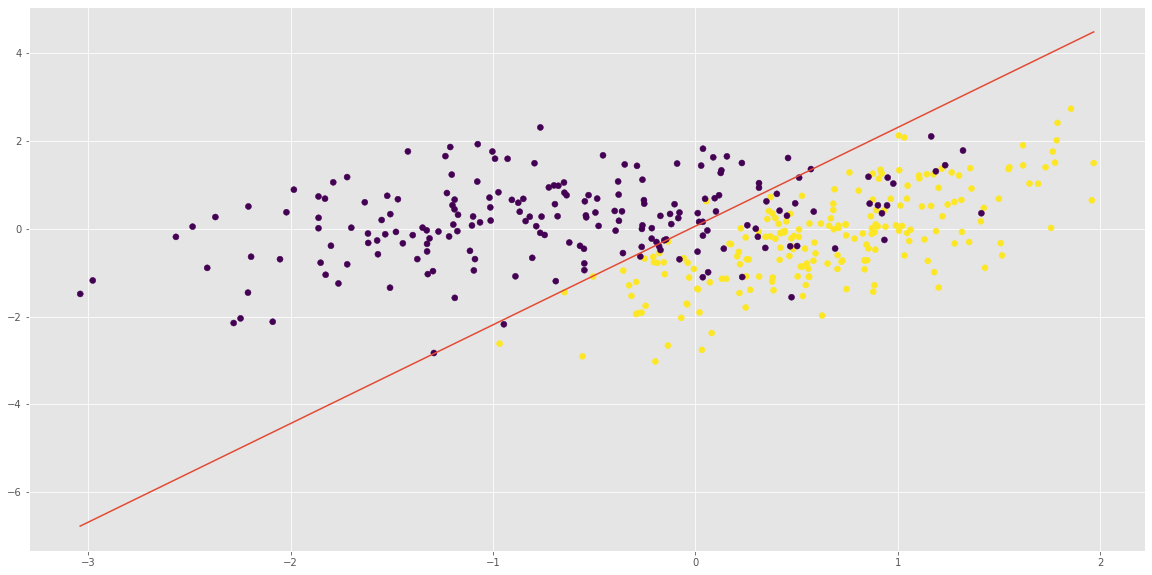

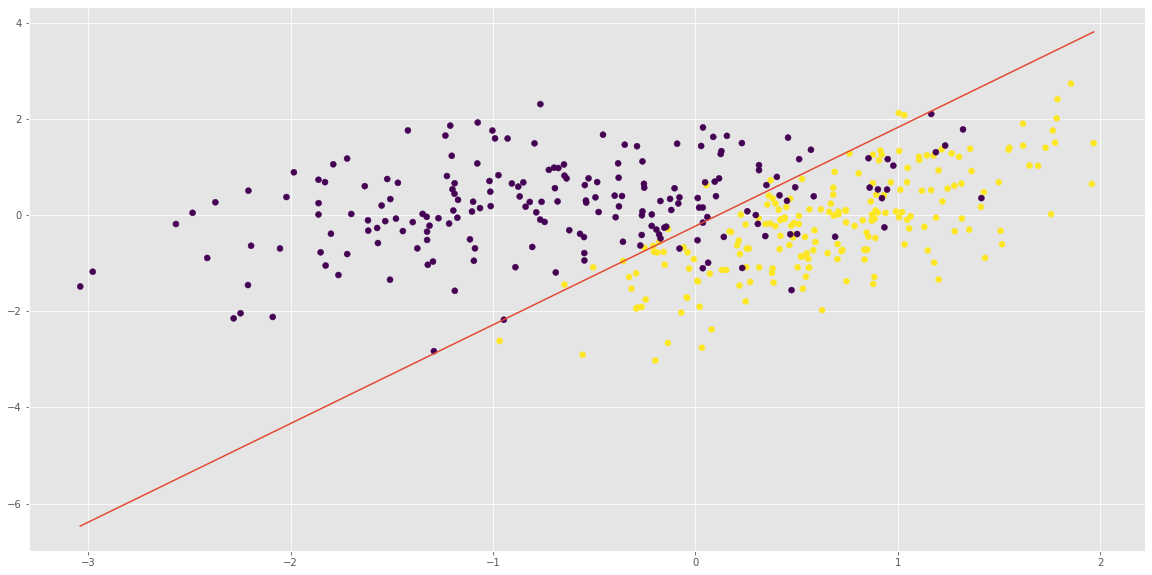

In [9]:
np.random.seed(0)
C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)
X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
model = MySGDClassifier(batch_generator, alpha=.01, C=100)
plot_decision_boundary(model, X, y)
model = MySGDClassifier(batch_generator,
                        alpha=.01, C=100, model_type='log_reg')
plot_decision_boundary(model, X, y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

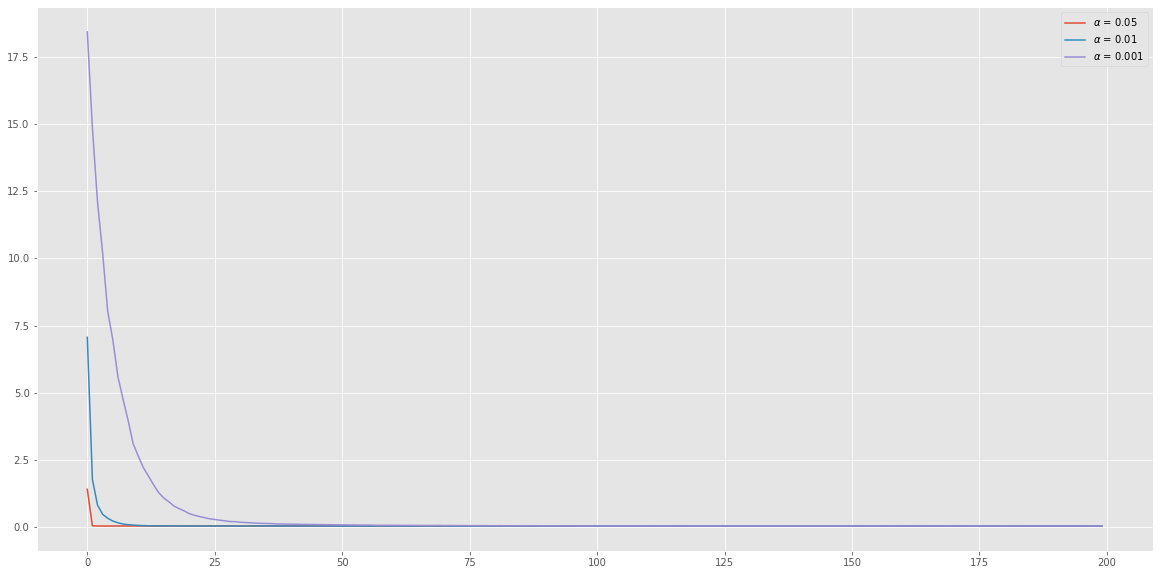

In [12]:
(fig, ax) = plt.subplots()
fig.set_size_inches(20, 10)
alphas = [0.05, 0.01, 0.001]
C = 100
N = 50
max_epoch = 10
for alpha in alphas:
    model = MySGDClassifier(batch_generator, alpha=alpha,
                            max_epoch=max_epoch, C=C,
                            model_type='lin_reg',
                            batch_size=100)
    model.fit(X, y)
    err = []
    for i in range(len(model.errors_log['iter']) // N):
        err.append(np.sum((model.errors_log['loss'])[i * N:
                   (i + 1) * N]) / N)
    ax.plot(range(len(model.errors_log['iter']) // N), err,
            label=r'$\alpha$ = {}'.format(alpha))
ax.legend(loc='upper right')
plt.show()

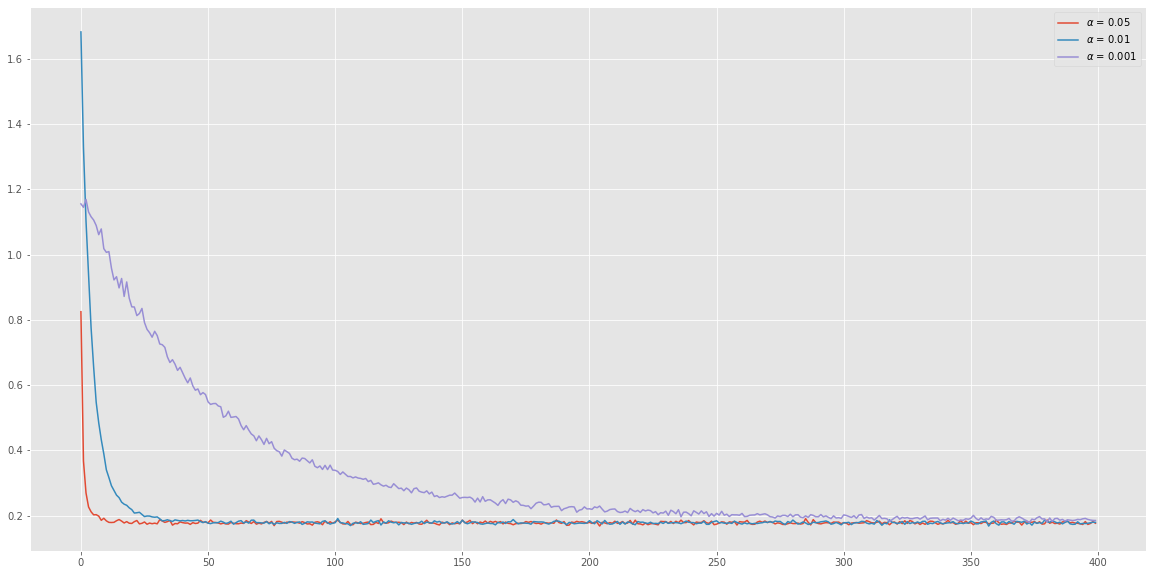

In [13]:
(fig, ax) = plt.subplots()
fig.set_size_inches(20, 10)
alphas = [0.05, 0.01, 0.001]
C = 100
N = 50
max_epoch = 20
for alpha in alphas:
    model = MySGDClassifier(batch_generator, alpha=alpha,
                            max_epoch=max_epoch, C=C,
                            model_type='log_reg',
                            batch_size=100)
    model.fit(X, y)
    err = []
    for i in range(len(model.errors_log['iter']) // N):
        err.append(np.sum((model.errors_log['loss'])[i * N:
                   (i + 1) * N]) / N)
    ax.plot(range(len(model.errors_log['iter']) // N), err,
            label=r'$\alpha$ = {}'.format(alpha))
ax.legend(loc='upper right')
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [14]:
alpha = 0.001
N = 50
max_epoch = 10
weights = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator, alpha=alpha,
                            max_epoch=max_epoch, C=C,
                            model_type='lin_reg',
                            batch_size=100)
    model.fit(X, y)
    weights.append(np.mean(np.abs(model.weights)))
print(weights)

[0.11564058442818094, 0.11695476795581765, 0.11493839569708003, 0.10933383974758139, 0.09448165958176627, 0.0709109684195338, 0.053631848318708396, 0.047384245262798004, 0.045893158967159266, 1.8766180291357353e+18]


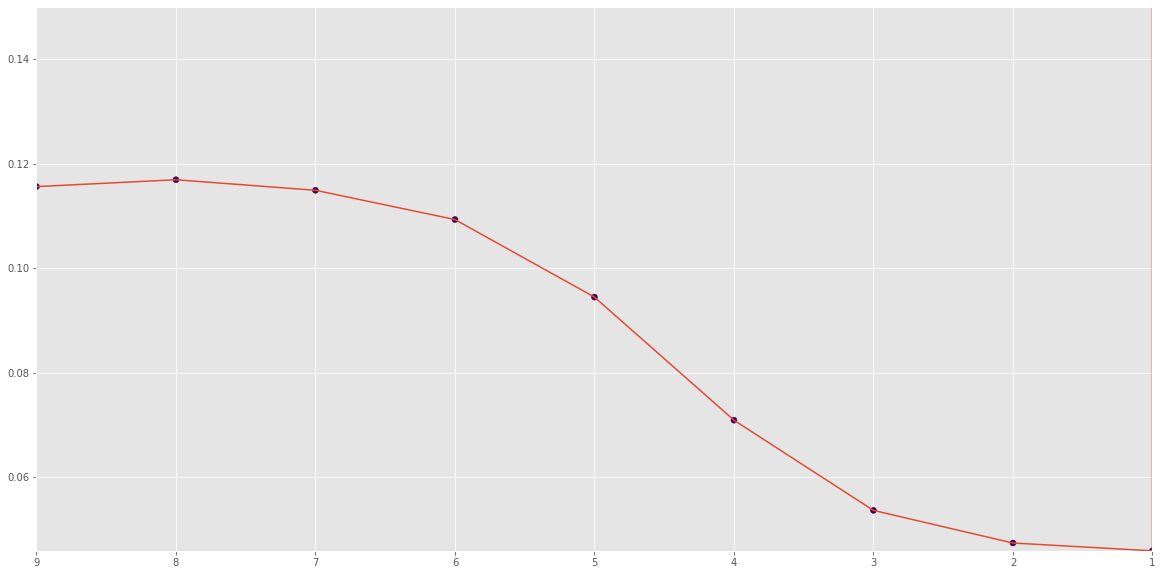

In [15]:
(fig, ax) = plt.subplots()
fig.set_size_inches(20, 10)
x_p = [i for i in range(9, -1, -1)]
y_p = weights
ax.set_ylim(min(y_p), 0.15)
ax.set_xlim(9, 1)
ax.scatter(x_p, y_p, c=y_p)
ax.plot(x_p, y_p)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

In [16]:
alpha = 0.0005
N = 50
max_epoch = 10
weights = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator, alpha=alpha,
                            max_epoch=max_epoch, C=C,
                            model_type='log_reg',
                            batch_size=100)
    model.fit(X, y)
    weights.append(np.mean(np.abs(model.weights)))
print(weights)

[0.82930491925467, 0.45328349805330165, 0.40400314717800556, 0.21657376705428177, 0.09077083756500494, 0.046872616359948056, 0.017679324131014886, 0.029571695619167247, 0.03399845095798501, 0.01942967165697854]


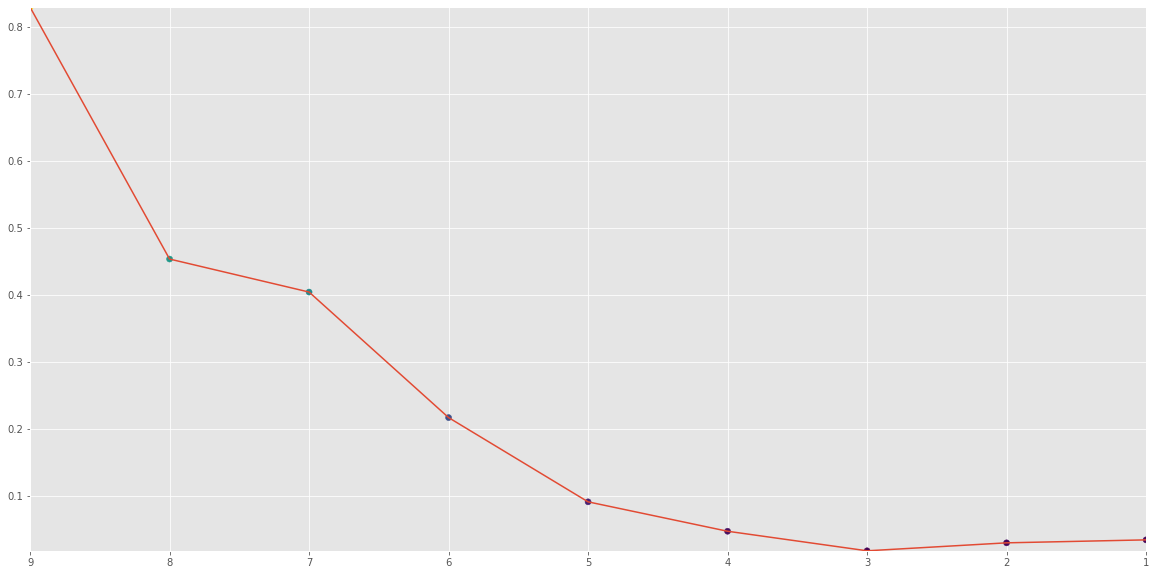

In [17]:
(fig, ax) = plt.subplots()
fig.set_size_inches(20, 10)
x_p = [i for i in range(9, -1, -1)]
y_p = weights
ax.set_ylim(min(y_p), max(y_p))
ax.set_xlim(9, 1)
ax.scatter(x_p, y_p, c=y_p)
ax.plot(x_p, y_p)
plt.show()

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [18]:
import io
doc_to_title = {}
with io.open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [19]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [20]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [21]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [22]:
from sklearn.model_selection import GroupShuffleSplit
groups = groups_train

In [23]:
group_kfold = GroupShuffleSplit(n_splits=5, train_size=.7)
for train_index, test_index in group_kfold.split(X_train, y_train, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_val, X_test_val = X_train[train_index], X_train[test_index]
    y_train_val, y_test_val = y_train[train_index], y_train[test_index]
    th = 0.3
    alpha = 0.0001
    C = 20
    batch_size = 3
    max_epoch = 20
    model = MySGDClassifier(batch_generator, alpha=alpha,
                            max_epoch=max_epoch, C=C,
                            model_type='log_reg',
                            batch_size=batch_size)
    model.fit(X_train_val, y_train_val)
    a = model.predict(X_test_val)
    a[np.where(a == -1)] = 0
    a[np.where(a == 1)] = 1
    print(f1_score(y_test_val, a))

TRAIN: [    0     1     2 ... 11687 11688 11689] TEST: [  102   103   104 ... 11248 11249 11250]
0.4672789896670494
TRAIN: [  102   103   104 ... 11687 11688 11689] TEST: [    0     1     2 ... 11596 11597 11598]
0.3895131086142322
TRAIN: [    0     1     2 ... 11596 11597 11598] TEST: [  876   877   878 ... 11687 11688 11689]
0.6634692246203038
TRAIN: [    0     1     2 ... 11687 11688 11689] TEST: [  382   383   384 ... 11596 11597 11598]
0.5104697226938314
TRAIN: [    0     1     2 ... 11687 11688 11689] TEST: [  561   562   563 ... 11248 11249 11250]
0.5639280505590665


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [24]:
group_kfold = GroupShuffleSplit(n_splits=5, train_size=.7)
for train_index, test_index in group_kfold.split(X_train, y_train, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_val, X_test_val = X_train[train_index], X_train[test_index]
    y_train_val, y_test_val = y_train[train_index], y_train[test_index]
    th = 0.35
    alpha = 0.001
    C = 1
    batch_size = 20
    max_epoch = 200
    model = MySGDClassifier(batch_generator, alpha=alpha,
                            max_epoch=max_epoch, C=C,
                            model_type='lin_reg',
                            batch_size=batch_size)
    model.fit(X_train_val, y_train_val)
    a = model.predict(X_test_val)
    a[np.where(a >= th)] = 1
    a[np.where(a < th)] = 0
    print(f1_score(y_test_val, a))

TRAIN: [  102   103   104 ... 11596 11597 11598] TEST: [    0     1     2 ... 11687 11688 11689]
0.6753926701570679
TRAIN: [  102   103   104 ... 11596 11597 11598] TEST: [    0     1     2 ... 11687 11688 11689]
0.5413260672116259
TRAIN: [    0     1     2 ... 11596 11597 11598] TEST: [  561   562   563 ... 11687 11688 11689]
0.6554258538694336
TRAIN: [  102   103   104 ... 11546 11547 11548] TEST: [    0     1     2 ... 11687 11688 11689]
0.48491497531541417
TRAIN: [    0     1     2 ... 11687 11688 11689] TEST: [  196   197   198 ... 11546 11547 11548]
0.6198764738910725


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [25]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))
X_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        all_dist_t = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist_t.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist_t, reverse=True)[0:15])
X_test = np.array(X_test)
th = 0.35
alpha = 0.0001
C = 1
batch_size = 20
max_epoch = 200
model = MySGDClassifier(batch_generator, alpha=alpha,
                        max_epoch=max_epoch, C=C,
                        model_type='lin_reg',
                        batch_size=batch_size)
model.fit(X_train, y_train)
a = model.predict(X_test)
a[np.where(a < th)] = 0
a[np.where(a >= th)] = 1
columns = ['pair_id', 'target']
data = []
for i in range(a.shape[0]):
    data.append([11691+i, int(a[i])])
df = pd.DataFrame(data, columns=columns)
df.to_csv('sub.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

In [26]:
# возникла небольшая путаница из-за классов (1,0) и (-1,1), 
# были сложности с пониманием переходов от марджина к а(х) а от нее к сигмоиде 
# не совсем ясно как именно подбирать параметры(я просто смотрела динамику f1score и меняла руками, но наверняка есть что-то получше) 
# в остальном вроде все понятно

In [27]:
# очень интересная домашняя работа!